#Ad Click-Through-Rate (CTR) Prediction using Reinforcement Learning

We will see the practical implementation of Upper Confidence Bound (UCB), a method of reinforcement learning applied in this task. Using this implementation, one can be able to find the best version of the advertisement from a set of available versions that can get a maximum number of clicks by the visitors on the website.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/Ads_CTR_Optimisation.csv')

In [4]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


As we can see the dataset in the above picture, it comprises values 1 or 0 for 10 ads that are displayed on the website. Each row of the dataset represents a visitor to the website. If the visitor has clicked on the ad, the value for that ad is 1 and if the visitor has ignored the ad, the value for that ad is 0. There are 10,000 such records in the dataset

#Using Random Selection Method

To see the difference, first, we need to see how random selection of ad versions works. From the set of 10 ad versions, one ad is selected at random and displayed to the visitor.

1213


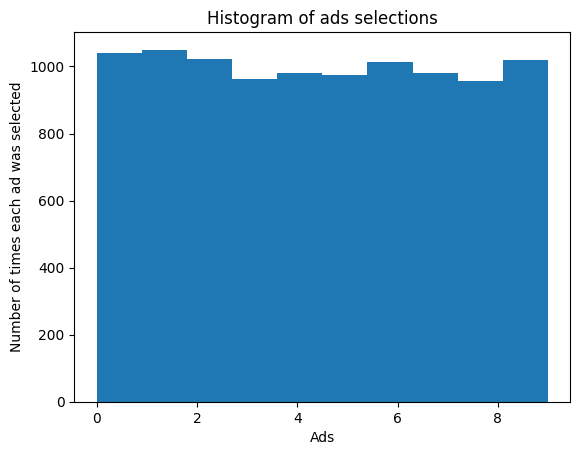

In [6]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward
print(total_reward)
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Once the above code snippet is executed, the above algorithm selects one ad at a random and displays before the visitor. If the visitor clicks on the ad, the reward 1 is added and if the visitor ignores it, the rewarded 0 is added.

for the first user, the second ad was displayed (keep in mind the indices in python) and rewarded 0 was added. For the second user, 5th ad was selected and reward 1 was added. In the same way, this random selection and addition of reward continue till the last, 10,000th visitor. In this way, the total reward value is calculated iteratively.

So, as we can see, the total reward using the random selection method is 1213. Now, we visualize through the histogram the number of times each ad was clicked.

#Using the UCB Method

In the above section, we have seen the random selection of ads and rewards received. Now we will see the implementation of Upper Confidence bound (UCB) in the same task.

2178


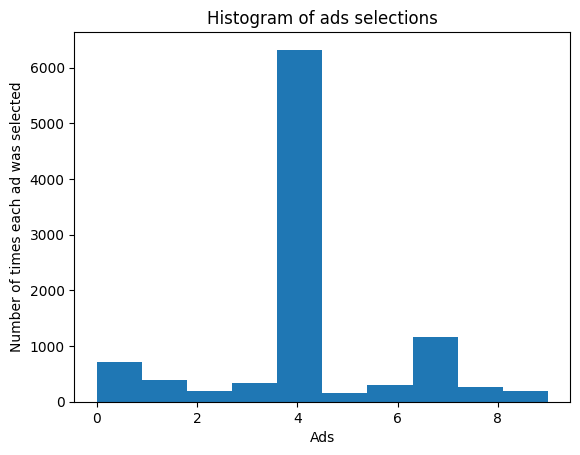

In [8]:
# Upper Confidence Bound
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
print(total_reward)

# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [9]:
print('Total reward: ',total_reward)

Total reward:  2178


The total reward received when using UCB algorithm is nearly double the total reward received in random selection. Finally, we can conclude that the Upper Confidence Bound (UCB) algorithm helps in finding the best ad from a set of ad versions to be displayed to visitors so that maximum click and highest conversion rate can be obtained